In [226]:
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.rcParams.update({
        'font.size': 14,
        'axes.titlesize': 25,
        'axes.labelsize': 25,
        'xtick.labelsize': 22,
        'ytick.labelsize': 22,
        'font.size': 20,
        'figure.figsize': (10, 7),
        'axes.grid': True,
        'grid.linestyle': '-',
        'grid.alpha': 0.3,
        'lines.markersize': 5.0,
        'xtick.minor.visible': True,
        'xtick.direction': 'in',
        'xtick.major.size': 20.0,
        'xtick.minor.size': 10.0,
        'xtick.top': False,
        'xtick.bottom': True,
        'ytick.minor.visible': True,
        'ytick.direction': 'in',
        'ytick.major.size': 12.0,
        'ytick.minor.size': 6.0,
        'ytick.right': True,
        'errorbar.capsize': 0.0,
    })

## Intro

In [5]:
students_performance = pd.read_csv('StudentsPerformance.csv')
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
display(students_performance.describe())
display(students_performance.dtypes)

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [11]:
students_performance.groupby('gender').aggregate({'writing score': 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [12]:
students_performance.iloc[0:5, 0:5]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [17]:
students_performance_with_names = students_performance.iloc[[0, 1, 3, 5, 7]]
student_name = ['Aliona', 'Beth', 'Chriss', 'Diana', 'Ethan']
students_performance_with_names.index = student_name
students_performance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Aliona,female,group B,bachelor's degree,standard,none,72,72,74
Beth,female,group C,some college,standard,completed,69,90,88
Chriss,male,group A,associate's degree,free/reduced,none,47,57,44
Diana,female,group B,associate's degree,standard,none,71,83,78
Ethan,male,group B,some college,free/reduced,none,40,43,39


In [19]:
students_performance_with_names.loc[['Aliona', 'Diana'], :]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Aliona,female,group B,bachelor's degree,standard,none,72,72,74
Diana,female,group B,associate's degree,standard,none,71,83,78


In [20]:
students_performance_with_names.loc[['Aliona', 'Diana'], ['gender', 'lunch']]

,gender,lunch
Aliona,female,standard
Diana,female,standard


In [21]:
my_series_1 = pd.Series([1, 2, 3], index=['Aliona', 'Diana', 'Ethan'])
my_series_2 = pd.Series([4, 5, 6], index=['Aliona', 'Diana', 'Ethan'])
pd.DataFrame({'col_name_1': my_series_1, 'col_name_2': my_series_2})

,col_name_1,col_name_2
Aliona,1,4
Diana,2,5
Ethan,3,6


In [23]:
students_performance.iloc[:7]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [31]:
titanic = pd.read_csv('titanic.csv')
print(f'cols = {titanic.shape[1]}, rows = {titanic.shape[0]}')
print(f'float cols = {(titanic.dtypes == float).sum()}')
print(f'int cols = {(titanic.dtypes == int).sum()}')
print(f'object cols = {(titanic.dtypes == object).sum()}')

cols = 12, rows = 891
float cols = 2
int cols = 5
object cols = 5


In [32]:
students_performance.loc[students_performance['gender']=='female', :]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [35]:
writing_score_mean = students_performance['writing score'].mean()
students_performance.loc[students_performance['writing score'] > writing_score_mean, :]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [45]:
lunch_reduced = students_performance['lunch'] == 'free/reduced'
print('free / reduced lunch')
display(students_performance.loc[lunch_reduced, :].mean())
display(students_performance.loc[lunch_reduced, :].std())
print('standard lunch')
display(students_performance.loc[~lunch_reduced, :].mean())
display(students_performance.loc[~lunch_reduced, :].std())

free / reduced lunch


math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

math score       15.159956
reading score    14.895339
writing score    15.433823
dtype: float64

standard lunch


math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

math score       13.653501
reading score    13.830602
writing score    14.339487
dtype: float64

In [65]:
students_performance.groupby(by=['lunch']).aggregate(['mean', 'std'])

math score            reading score            writing score  \
                   mean        std          mean        std          mean   
lunch                                                                       
free/reduced  58.921127  15.159956     64.653521  14.895339     63.022535   
standard      70.034109  13.653501     71.654264  13.830602     70.823256   

                         
                    std  
lunch                    
free/reduced  15.433823  
standard      14.339487

In [70]:
# rename columns
new_cols = ['_'.join(col.split(' ')) for col in students_performance.columns]
cols_rename = {k: v for k, v in zip(students_performance.columns, new_cols)}
students_performance = students_performance.rename(columns=cols_rename)
students_performance

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [71]:
students_performance.query("writing_score > 74")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
991,female,group B,some high school,standard,completed,65,82,78
992,female,group D,associate's degree,free/reduced,none,55,76,76
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [76]:
students_performance.query("gender == 'female'")
students_performance.query("gender == 'female' & math_score > 88")
writing_score_query = 90
students_performance.query("writing_score > @writing_score_query")

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
6,female,group B,some college,standard,completed,88,95,92
94,female,group B,some college,standard,none,79,86,92
106,female,group D,master's degree,standard,none,87,100,100
110,female,group D,associate's degree,free/reduced,completed,77,89,98
...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,standard,none,100,100,100
970,female,group D,bachelor's degree,standard,none,89,100,100
979,female,group C,associate's degree,standard,none,91,95,94
983,female,group A,some college,standard,completed,78,87,91


### filter()

In [80]:
score_cols = [i for i in students_performance.columns if 'score' in i]
students_performance[score_cols].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [82]:
students_performance.filter(like='score').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [86]:
students_performance_with_names.filter(like='e', axis=0)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Beth,female,group C,some college,standard,completed,69,90,88


### groupby() and aggregate()

In [92]:
students_performance.groupby('gender', as_index=False) \
    .aggregate({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns={'math_score': 'mean_math_score', 'reading_score': 'mean_reading_score'})

,gender,mean_math_score,mean_reading_score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [95]:
mean_scores = students_performance.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score': 'mean', 'reading_score': 'mean'}) \
    .rename(columns={'math_score': 'mean_math_score', 'reading_score': 'mean_reading_score'})
mean_scores

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [103]:
# Число уникальных значений оценок на пересечении групп
students_performance.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

In [106]:
# Top 5 studints in math (genderwise)
students_performance.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [123]:
students_performance['total_score'] = 0
students_performance['total_score'] = students_performance.loc[:, students_performance.dtypes == int].apply('sum', axis=1)

In [125]:
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [126]:
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [128]:
students_performance.drop(['total_score', 'lunch'], axis=1)

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,5.641907
996,male,group C,high school,none,62,55,55,5.147494
997,female,group C,high school,completed,59,71,65,5.273000
998,female,group D,some college,completed,68,78,77,5.407172


### Dota 2 heroes

In [129]:
dota_heroes = pd.read_csv('dota_hero_stats.csv')
dota_heroes

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [133]:
print(f'heroes with 0 legs = {(dota_heroes.legs == 0).sum()}')

heroes with 0 legs = 11


In [145]:
display(dota_heroes.groupby('legs').size())
display(dota_heroes.legs.value_counts())

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [147]:
pupa_lupa = pd.read_csv('accountancy.csv')
pupa_lupa.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [153]:
pupa_lupa.groupby(['Type', 'Executor'], as_index=False).aggregate({'Salary': 'mean'}) \
    .sort_values(['Type', 'Salary'], ascending=[True, False]) \
    .groupby('Type') \
    .head(1)

,Type,Executor,Salary
1,A,Pupa,160.833333
2,B,Loopa,145.166667
4,C,Loopa,154.333333
7,D,Pupa,146.500000
8,E,Loopa,164.000000
10,F,Loopa,238.000000


In [158]:
dota_heroes.groupby(['attack_type', 'primary_attr']).size().sort_values(ascending=False)

attack_type  primary_attr
Ranged       int             40
Melee        str             35
             agi             19
Ranged       agi             18
             str              3
Melee        int              2
dtype: int64

In [160]:
concentrations = pd.read_csv('algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [166]:
mean_concentrations = concentrations.groupby('genus').mean()
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [174]:
concentration_stats = concentrations.groupby('genus').aggregate({'alanin': ['min', 'mean', 'max']})\
    .apply(lambda x: round(x, 2))
concentration_stats

alanin            
               min  mean   max
genus                         
Ascophyllum   0.88  0.88  0.88
Cladophora    1.65  4.00  6.88
Fucus         0.35  3.57  6.64
Palmaria      3.18  3.18  3.18
Saccharina    1.26  3.52  5.79

In [177]:
print(*concentration_stats.loc['Fucus', :].values)

0.35 3.57 6.64


In [197]:
display( concentrations.groupby('group').aggregate({'citrate': 'std'})**2 )
concentration_glucose = concentrations.groupby('group').aggregate({'glucose': ['max', 'min']})
concentration_glucose = concentration_glucose\
    .assign(amplitude = concentration_glucose.loc[:, ('glucose', 'max')] - concentration_glucose.loc[:, ('glucose', 'min')])
display(concentration_glucose)

,citrate
group,
brown,5.468942
green,3.950113
red,NaN


glucose           amplitude
            max       min          
group                              
brown  6.013219  2.272724  3.740495
green  3.343707  2.316955  1.026753
red    3.242090  3.242090  0.000000

In [223]:
concentrations.groupby('group').aggregate({'glucose': np.ptp})

,glucose
group,
brown,3.740495
green,1.026753
red,0.000000


In [222]:
concentrations.groupby('group').size()

group
brown    6
green    3
red      1
dtype: int64

## Визуализация данных

<AxesSubplot:>

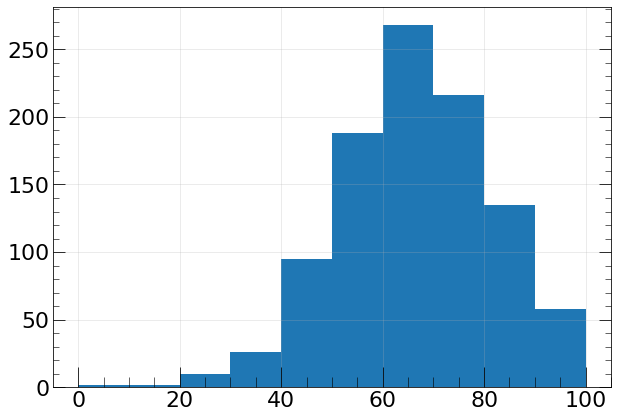

In [227]:
students_performance.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

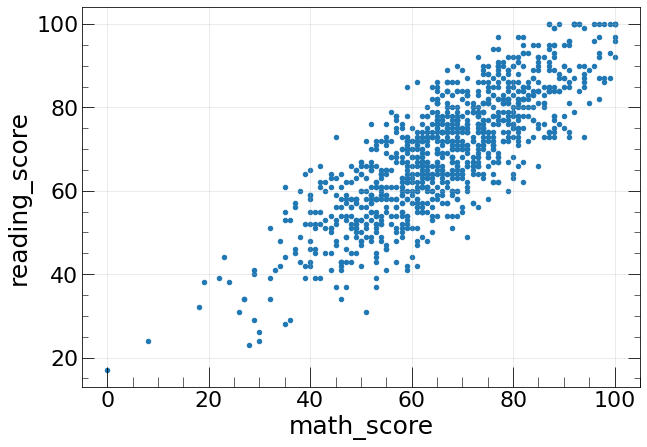

In [228]:
students_performance.plot.scatter(x='math_score', y='reading_score')

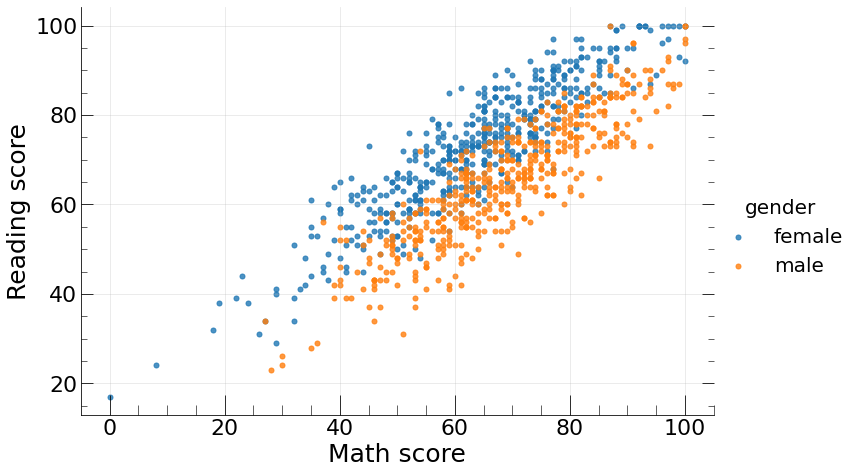

In [242]:
ax = sns.lmplot(x='math_score',
                y='reading_score',
                hue='gender',
                data=students_performance,
                fit_reg=False,
                height=7.,
                aspect=12./8.)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

In [246]:
df = pd.read_csv('income.csv')
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

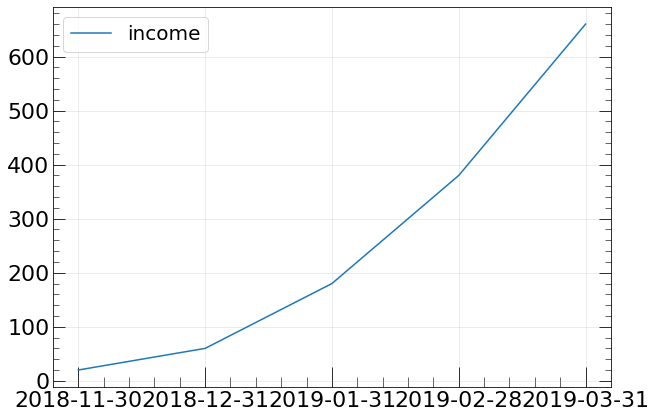

In [255]:
df.plot()

In [259]:
data = pd.read_csv('dataset_209770_6.txt', delimiter=' ')
data.head()

,x,y
0,883.001110,101.495564
1,1006.830337,1008.691134
2,998.166094,1011.916452
3,1111.127628,1110.981103
4,908.503312,107.369662


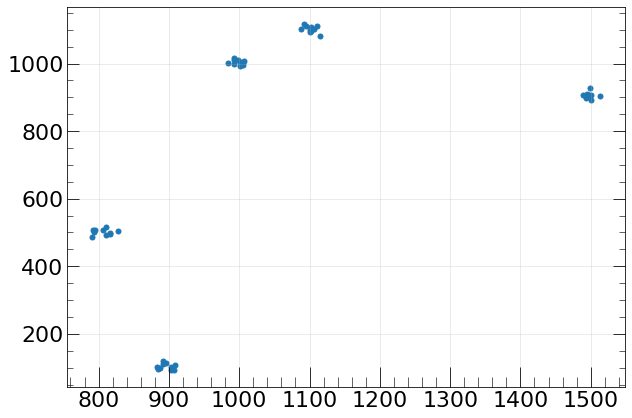

In [262]:
plt.scatter(x=data.x, y=data.y)

In [274]:
genome_matrix = pd.read_csv('genome_matrix.csv')
genome_matrix = genome_matrix.rename(columns={'Unnamed: 0': 'Index'})
genome_matrix

,Index,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


In [275]:
genome_matrix.index = genome_matrix['Index']
genome_matrix = genome_matrix.drop(['Index'], axis=1)
genome_matrix

,species0,species1,species2,species3,species4
Index,,,,,
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


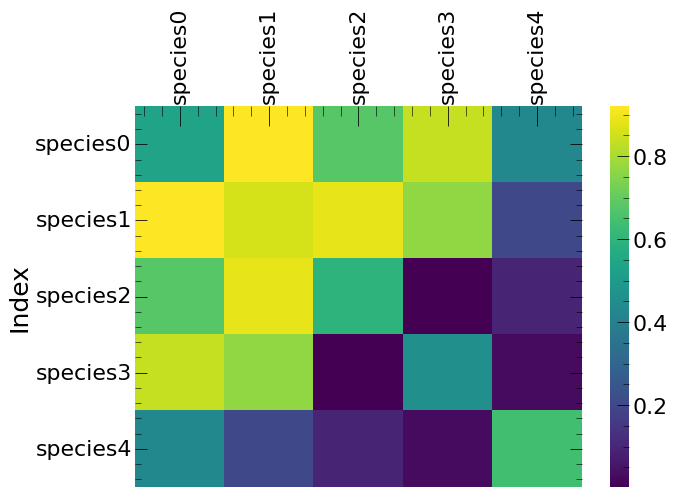

In [276]:
g = sns.heatmap(data=genome_matrix, cmap='viridis')
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

mode = 4


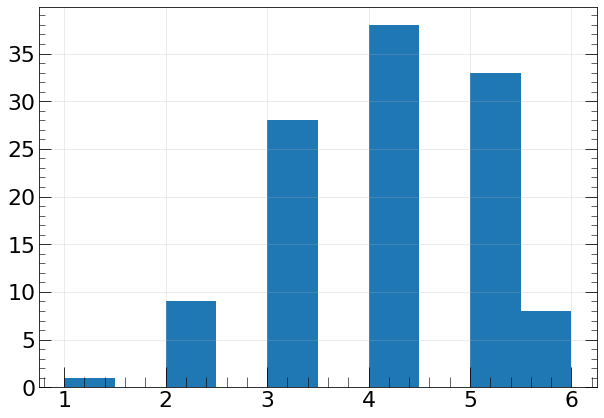

In [309]:
roles_series = dota_heroes['roles'].apply(lambda x: len(x.strip("[]").replace("'", '').split(', ')))
roles_series.hist()
print('mode =', roles_series.mode()[0])

In [314]:
iris = pd.read_csv('iris.csv')
iris = iris.drop('Unnamed: 0', axis=1)
iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:ylabel='Density'>

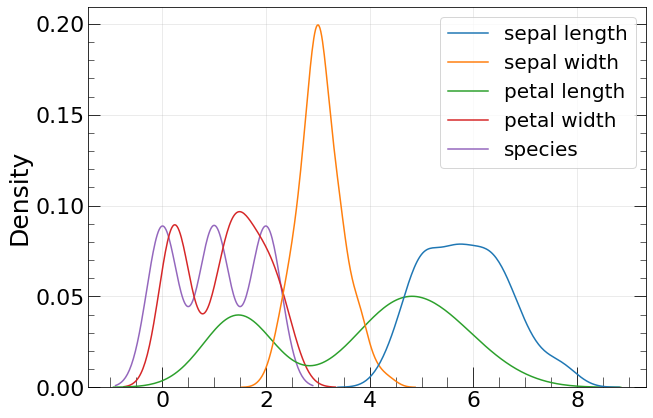

In [316]:
sns.kdeplot(data=iris)

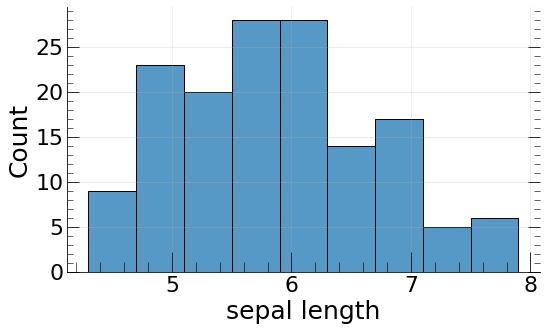

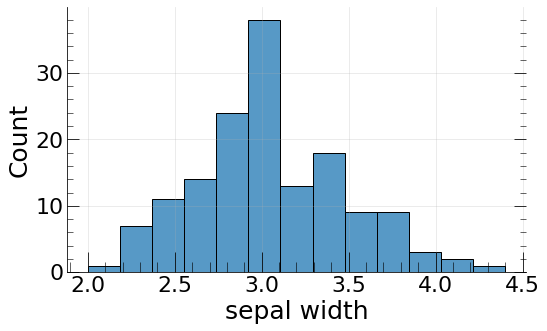

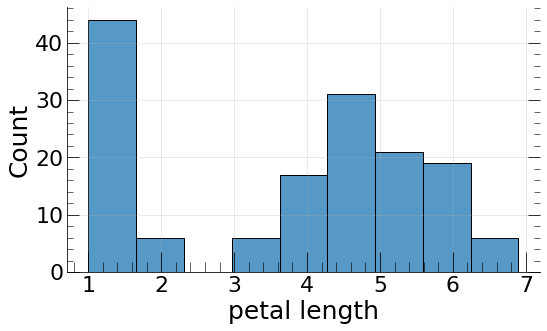

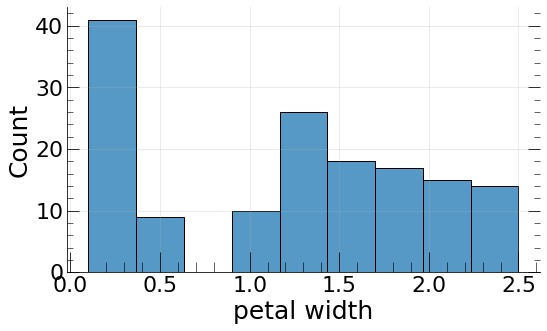

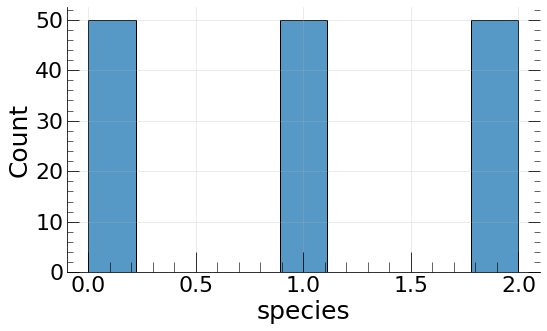

In [326]:
for col in iris.columns:
    sns.displot(x=iris[col], height=5., aspect=8./5.)

In [333]:
for col in iris.columns:
    print(f'{col}: {np.ptp(iris[col])}')

sepal length: 3.6000000000000005
sepal width: 2.4000000000000004
petal length: 5.9
petal width: 2.4
species: 2


<AxesSubplot:xlabel='petal length'>

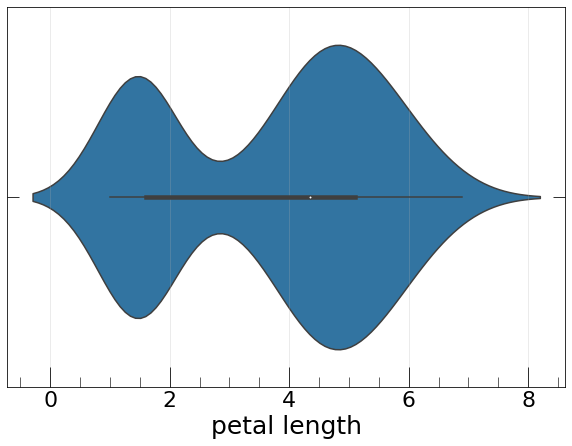

In [335]:
sns.violinplot(x=iris['petal length'], data=iris)

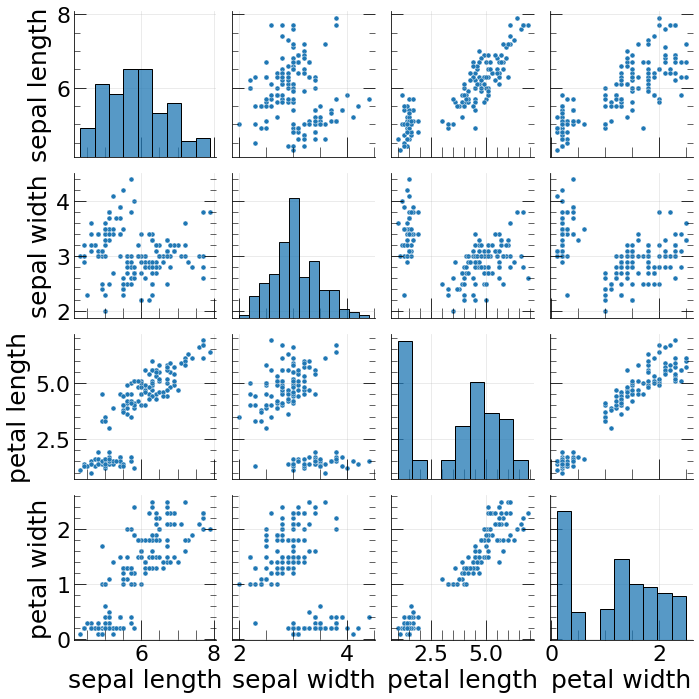

In [337]:
sns.pairplot(data=iris.drop(['species'], axis=1))

## Pandas exercises

In [341]:
my_data = pd.DataFrame({
    'type': ['A', 'A', 'B', 'B'],
    'value': [10, 14, 12, 23]
})
my_data

,type,value
0,A,10
1,A,14
2,B,12
3,B,23


In [390]:
my_stat = pd.read_csv('my_stat.csv')
my_stat = my_stat.loc[:19, :]
subset_1 = my_stat.loc[0:9, ['V1', 'V3']]
subset_2 = my_stat.loc[[i for i in my_stat.index if not i in [1, 5]], ['V2', 'V4']]
subset_2

,V2,V4
0,13.0,1.0
2,11.0,0.0
3,11.0,2.0
4,10.0,-1.0
6,9.0,2.0
7,9.0,1.0
8,9.0,2.0
9,10.0,0.0
10,10.0,1.0
11,10.0,1.0


In [391]:
subset_1 = my_stat.loc[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
subset_2 = my_stat.loc[(my_stat['V2'] != 0) | (my_stat['V4'] >= 1)]

In [392]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
5,2,11.0,A,0.0,2.0,2.397895
6,0,9.0,A,2.0,2.0,2.197225
7,1,9.0,A,1.0,2.0,2.197225
8,0,9.0,B,2.0,2.0,2.197225
9,-1,10.0,A,0.0,-1.0,2.302585


In [393]:
col_names = {'V1': 'session_value', 'V2': 'group', 'V3': 'time', 'V4': 'n_users'}
my_stat = my_stat.rename(columns=col_names).drop(['V5', 'V6'], axis=1)
my_stat.head()

,session_value,group,time,n_users
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [406]:
my_stat = pd.read_csv('my_stat_1.csv')
my_stat

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [407]:
my_stat.session_value = my_stat.session_value.replace(np.nan, 0)
my_stat.n_users[my_stat.n_users < 0] = my_stat[my_stat.n_users >= 0].n_users.median()

/home/andy/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [412]:
my_stat.groupby('group', as_index=False).agg({'session_value': 'mean'}).rename(columns={'session_value': 'mean_session_value'})

,group,mean_session_value
0,A,0.8
1,B,0.8
